In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir('./code/')

## Set-up

We start with an elliptic curve mod a prime $p$ - for example, $y^2 = x^3 + 2x$ mod 5 - and we compute the cardinality.

This just means counting the number of points in the following picture:

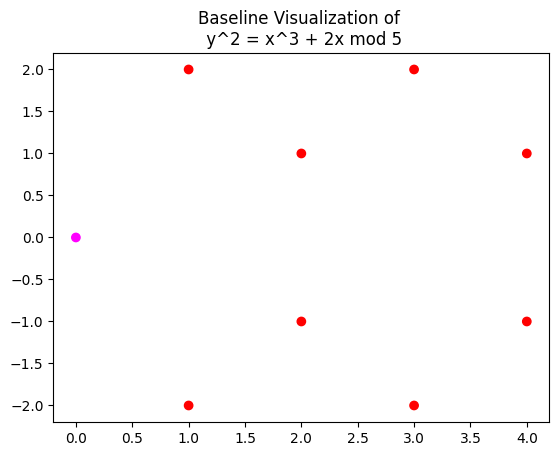

In [3]:
from ecfppoints import *
# Make ecfp pic

sqrts5 = get_sqrt_dic(5)

pts_test5 = np.array(get_points_wtwst((2,0),sqrts5))
plt.figure()
plt.title('Baseline Visualization of \n y^2 = x^3 + 2x mod 5')
plt.scatter(x=pts_test5[::,0],y = pts_test5[::,1],c=[[int(z<=0),0,int(z>=0)] for z in pts_test5[::,2]])
plt.show()

Ok there are 9 points in the picture, and we add 1 for the point at infinity, so the cardinality is 10.

## EDA
Once we know the cardinality, we know where we lie on the following picture:

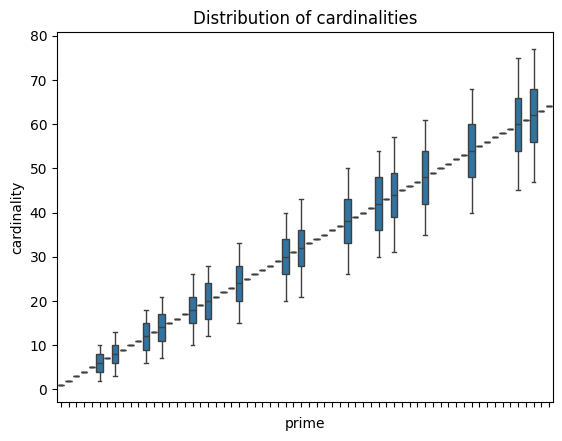

In [4]:
cardinality_df = pd.read_pickle('cardinalityprecomputed.pk')
cardinality_df_small = cardinality_df.loc[cardinality_df.prime<64]
cardinality_df_dummy = pd.DataFrame({'prime':[n for n in range(64)],
                                     'coef':[None for n in range(64)],
                                     'cardinality':[n+1 for n in range(64)]})
cardinality_df_dummy = pd.concat([cardinality_df_dummy,cardinality_df_small],axis=0)

sns.boxplot(data=cardinality_df_dummy, x="prime", y="cardinality", whis=(0, 100))
plt.gca().set_xticklabels([])
plt.title('Distribution of cardinalities')
plt.show()


We compute the "normalized cardinality" (aka the (negative) of the trace of Frobenius) by subtracting $p+1$ from the cardinality.

In our example, we subtract $p+1 = 5+1 = 6$ from $10$ to get a "normalized cardinality" of 4. That tells us where we land in this picture:

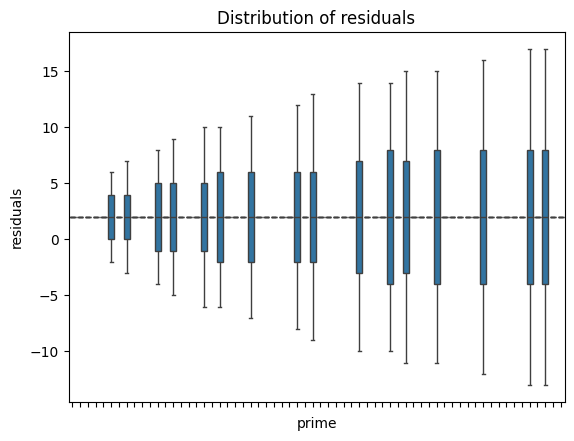

In [5]:
cardinality_df_dummy['residuals']= 1+cardinality_df_dummy.cardinality-cardinality_df_dummy.prime
sns.boxplot(data=cardinality_df_dummy, x="prime", y="residuals", whis=(0, 100))
plt.gca().set_xticklabels([])
plt.title('Distribution of residuals')
plt.show()

Now comes the magic trick: we solve the quadratic $x^2 -rx+ p = 0$, where $r$ is the difference we just obtained. 

For our example, $r = 10-(5+1)=4$ and $p = 5$,
so we need to solve $x^2 + 4x + 5 = 0$. By the quadratic formula, the roots are $-2\pm i$.

To obtain pictures for the example, we need to find the lattices that have $-2+i$ as a symmetry.
This turns out to be easy: 
* If $-2+i$ is a symmetry, then $(-2+i)+2 = i$ is a symmetry.
* There is only one lattice with $i$ as a symmetry, namely the square lattice.


In [3]:
from lattices import *

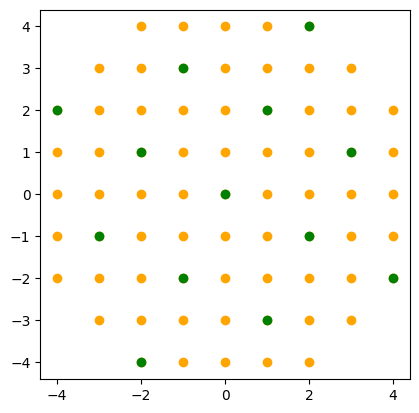

In [5]:
square_lattice_pts = lattice_pts(np.array([1,0]),np.array([0,1]),5)
square_lattice_sym = lattice_pts(np.array([-2,1]),np.array([-1,-2]),5)

plt.figure()

plt.scatter(x=square_lattice_pts[::,0],
            y = square_lattice_pts[::,1],
            c = 'orange')
plt.scatter(x=square_lattice_sym[::,0],
            y = square_lattice_sym[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

In the general case, one should expect multiple lattices with any given symmetry. (Depending on how various conjectures work out, it is possible that there are only a finite number of ecfp's overall that have exactly one associated lattice, or there may be infinitely such curves.)

In fact, if we had chosen $y^2 = x^3 \pm x$ instead of $y^2 = x^3 + 2x$ (and kept $p = 5$), then the roots would be $\pm 1 \pm 2i$. There are two lattices with this as a symmetry: the square lattice and the lattice generated by $\tau = 2i$.

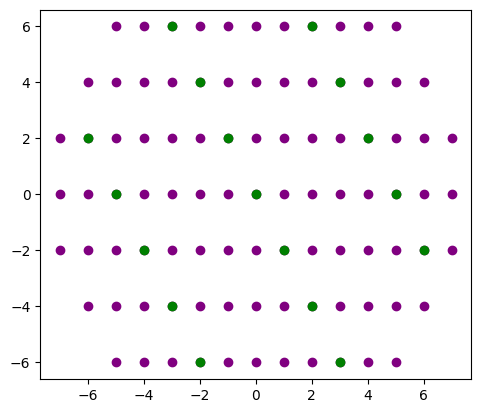

In [8]:
tau2i_lattice_pts = lattice_pts(np.array([1,0]),np.array([0,2]),8)
tau2i_lattice_sym2 = lattice_pts(np.array([-1,2]),np.array([-4,-2]),8)

plt.figure()

plt.scatter(x=tau2i_lattice_pts[::,0],
            y = tau2i_lattice_pts[::,1],
            c = 'purple')
plt.scatter(x=tau2i_lattice_sym2[::,0],
            y = tau2i_lattice_sym2[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

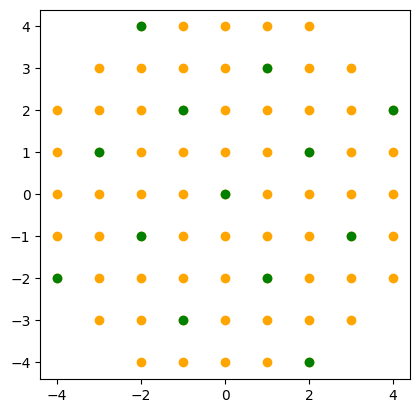

In [9]:
square_lattice_sym2 = lattice_pts(np.array([-1,2]),np.array([-2,-1]),5)

plt.figure()

plt.scatter(x=square_lattice_pts[::,0],
            y = square_lattice_pts[::,1],
            c = 'orange')
plt.scatter(x=square_lattice_sym2[::,0],
            y = square_lattice_sym2[::,1],
            c = 'green')
plt.gca().set_aspect('equal')

plt.show()

## Obtaining pictures
We have our complex root $\xi$ and we've picked a lattice $\Lambda$ with $\xi$ as a symmetry.
We can now make a picture of the original curve and also add points that are defined over any field extension of the original field!
We can identify the points on the complex plane mod $\Lambda$ that represent points over $\mathbb{F}_{p^n}$ by checking whether $\xi^n z \equiv z \pmod{\Lambda}$.

Now, there are uncountably many points we would hypothetically have to check, but we can use the geometry of the complex plane to obtain the points effortlessly (without needing to check anything):
* $\xi^n z \equiv z \pmod{\Lambda}$ is equivalent to $(\xi^n-1)z \equiv 0 \pmod{\Lambda}$.
* To find representatives of every point with that property, we just need to compute a large subset of points in $\Lambda$, and divide those points by $\xi^n - 1$.


In [6]:
ecex = EllCurveCPVis(-4,5)

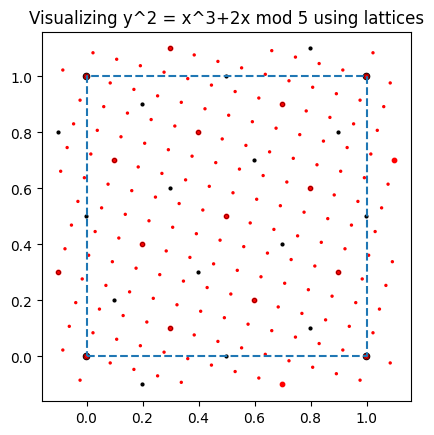

In [7]:
ecex.make_plots(k=0,sizes = [20,10,4,2],ep=0.1)
plt.title('Visualizing y^2 = x^3+2x mod 5 using lattices')
plt.show()

Once we have the data needed to make these pictures, we can obtain additional pictures by passing these points through the complex exponential. 

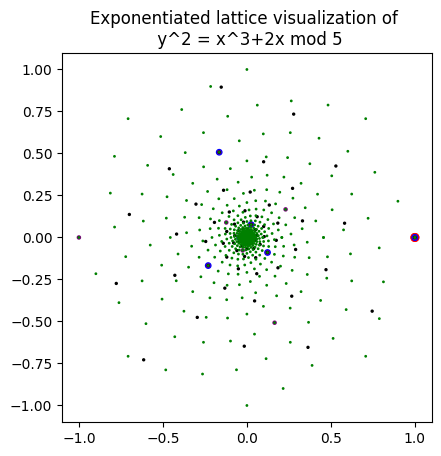

In [8]:
ecex.make_plots_exp(k=0,sizes = [30,15,5,2,1],colors=['red','blue','purple','black','green'],ep=0.001)
plt.title('Exponentiated visualization of \n y^2 = x^3+2x mod 5')
plt.show()

There are a lot of points clustered around 0: this is because the exponential map warps lengths. We can obtain a picture that's easier to understand by changing the scale of the lengths.

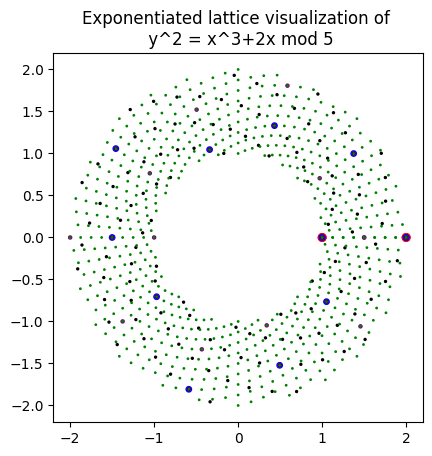

In [9]:
ecex.make_plots_exp_rn(k=0,sizes = [30,15,5,2,1],colors=['red','blue','purple','black','green'],ep=0.001)
plt.title('Renormalized Exponentiated visualization of \n y^2 = x^3+2x mod 5')
plt.show()

The torus structure is much easier to see on this picture; we can also see the mod 5 points in blue form a loop that wraps around the big circle once (and "crosses the edge" 3 times).

We can eliminate the edges altogether by passing to R^3.

In [4]:
%matplotlib widget 

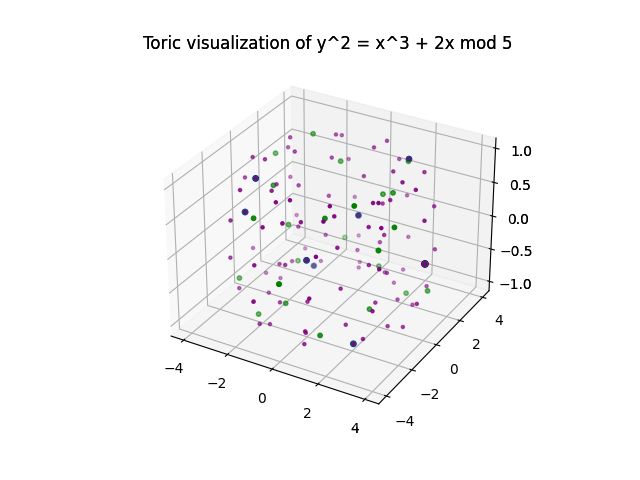

In [7]:
make_3d_plot((-2,5),2,[20,15,10,5],['red','blue','green','purple'])
plt.title('Toric visualization of y^2 = x^3 + 2x mod 5')
plt.show()

This is as good as we're going to get without passing to $\mathbb{C}^2$, so this is the end of the "obtaining visualizations" portion.

## What's next?

We have great visualizations, but we also have a problem: if two curves have the same cardinality and the same prime, we can't tell them apart! Well - we sort of can: we will have a unique picture for each curve, but we have to do some additional work to determine which picture goes with which curve.

For example, the curves $y^2 = x^3 + x$ mod 5 and $y^2 = x^3 + x + 2$ mod 5 both have cardinality 8. One of them (the first) should be visualized using $\tau = i$ and the other using $\tau = 2i$. 

But:
* How do we know this?
* Can we always figure out which lattice belongs to which curve mod $p$?

We will answer the first question, and explain why the second question is hard, in Part II.